In [1]:
# data-gradients
# !pip install data-gradients

In [2]:
import numpy as np
import requests 
import os
import zipfile

import torch
import torchvision
import torchvision.transforms as transforms

from data_gradients.managers.classification_manager import ClassificationAnalysisManager

## Image Classification Datasets

### Data Analysis on CIFAR-10

In [3]:
# Define transformations for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors
    #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize pixel values to [-1, 1]
])

# Download CIFAR-10 training dataset
train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Download CIFAR-10 test dataset
val_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=64, shuffle=False)

# CIFAR-10 class names
cifar10_classes = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

Files already downloaded and verified
Files already downloaded and verified


INFO:data_gradients.utils.summary_writer:`log_dir` was not set, so the logs will be saved in /Users/iryna/Documents/projects/data-gradients-use/logs/Testing_Data-Gradients_Classification
INFO:data_gradients.dataset_adapters.config.data_config:Cache deactivated for `ClassificationDataConfig`.


  - Executing analysis with: 
  - batches_early_stop: None 
  - len(train_data): 782 
  - len(val_data): 157 
  - log directory: /Users/iryna/Documents/projects/data-gradients-use/logs/Testing_Data-Gradients_Classification 
  - Archive directory: /Users/iryna/Documents/projects/data-gradients-use/logs/Testing_Data-Gradients_Classification/archive_20240304-155833 
  - feature extractor list: {'Image Features': [ClassificationSummaryStats, ImagesResolution, ImageColorDistribution, ImagesAverageBrightness], 'Classification Features': [ClassificationClassFrequency, ClassificationClassDistributionVsArea]}
╔══════════════════════════════════════════════════════════════════════════╗
║  To better understand how to tackle the data issues highlighted in this  ║
║  report, explore our comprehensive course on analyzing computer vision   ║
║  datasets. click here: https://hubs.ly/Q01XpHBT0                         ║
╚══════════════════════════════════════════════════════════════════════════╝


Analyzing... :   0%|                                                            | 0/782 [00:00<?, ?it/s]

Analyzing... :   0%|                                                 | 1/782 [00:59<12:48:54, 59.07s/it]

Great! You chose: `RGB`


Analyzing... : 50000it [01:10, 711.81it/s]                                                              
Summarizing... : 100%|████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.33s/it]


Dataset successfully analyzed!
Starting to write the report, this may take around 10 seconds...

Your dataset evaluation has been completed!

----------------------------------------------------------------------------------------------------
Training Configuration...
`ClassificationDataConfig` cache is not enabled because `cache_path=None` was not set.

----------------------------------------------------------------------------------------------------
Report Location:
    - Temporary Folder (will be overwritten next run):
        └─ /Users/iryna/Documents/projects/data-gradients-use/logs/Testing_Data-Gradients_Classification
                ├─ Report.pdf
                └─ summary.json
    - Archive Folder:
        └─ /Users/iryna/Documents/projects/data-gradients-use/logs/Testing_Data-Gradients_Classification/archive_20240304-155833
                ├─ Report.pdf
                └─ summary.json

Seen a glitch? Have a suggestion? Visit https://github.com/Deci-AI/data-gradients !


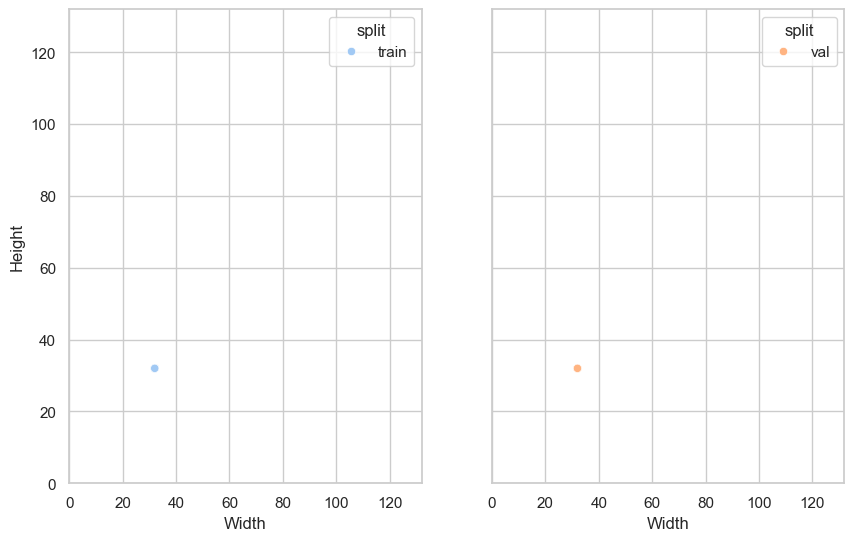

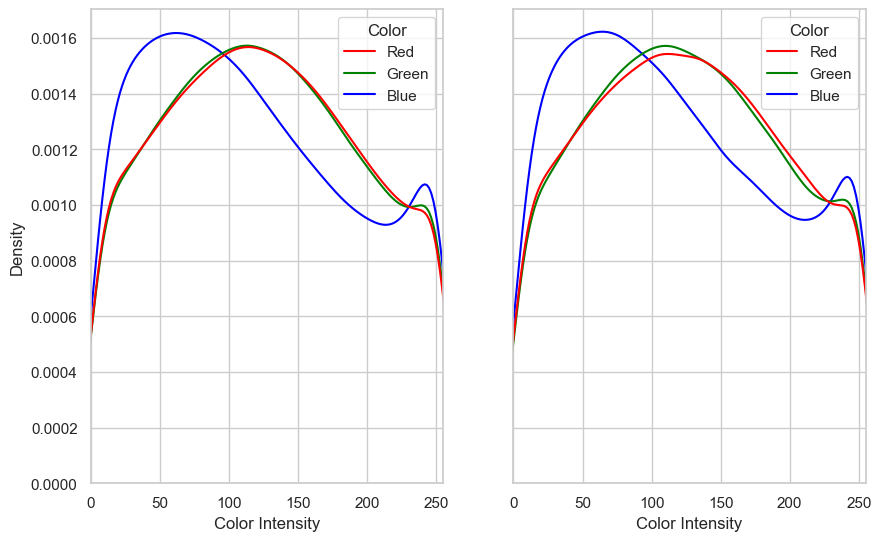

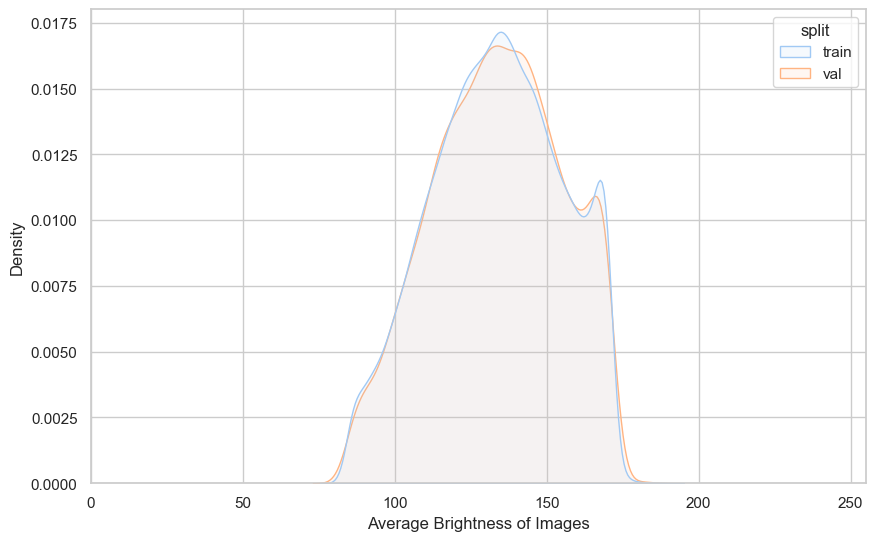

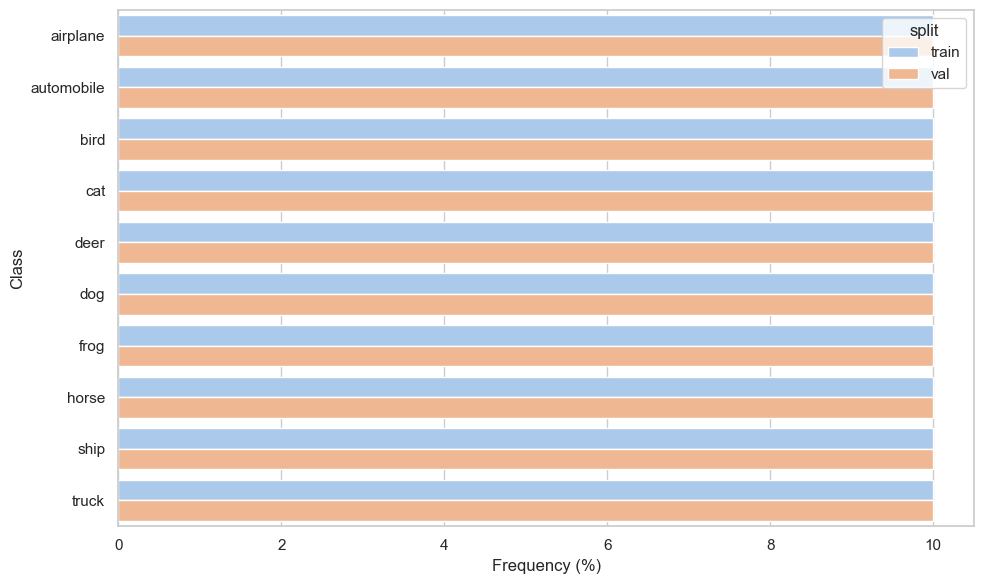

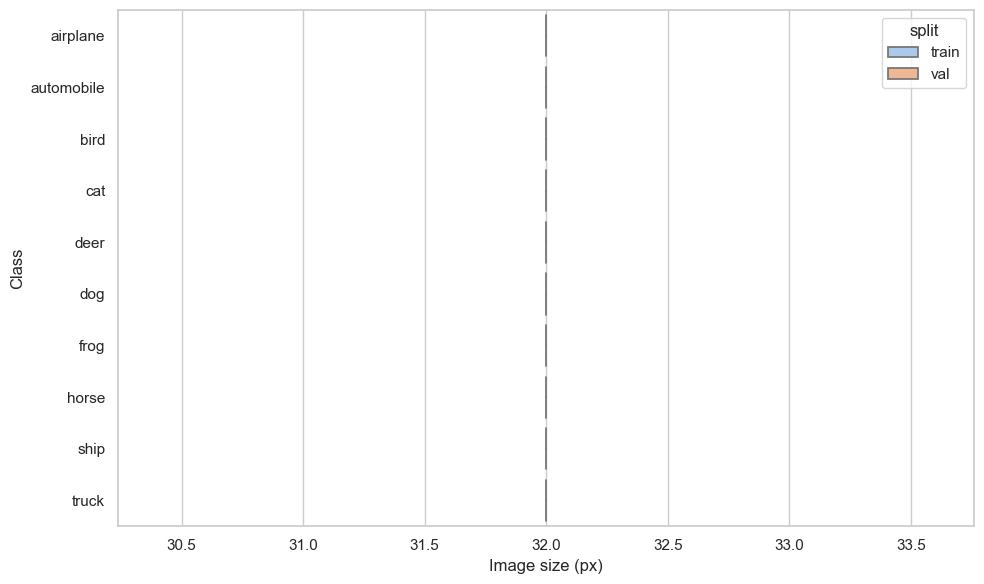

In [4]:
analyzer = ClassificationAnalysisManager(
    report_title="Testing Data-Gradients Classification",
    train_data=train_loader,
    val_data=val_loader,
    class_names=cifar10_classes,
)

analyzer.run()

### Data Analysis on iBean

Original data: [iBean dataset](https://github.com/AI-Lab-Makerere/ibean/)

In [5]:
# Specify links to the original datasets
train_URL = "https://storage.googleapis.com/ibeans/train.zip"
validation_URL = "https://storage.googleapis.com/ibeans/validation.zip"
test_URL = "https://storage.googleapis.com/ibeans/test.zip"

In [7]:
# Supplementary function to perfom data download

def download_data(url_to_zip, destination_folder):
    # Downloading the file by sending the request to the URL
    req = requests.get(url_to_zip)
    # Splitting URL to get the file name
    filename = url_to_zip.split('/')[-1]
  
    # Check if 'destination_folder' exists 
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)  # create a new directory of doesn't exist

    # Writing file to 'destination_folder'
    with open(destination_folder + filename,'wb') as output_file:
        output_file.write(req.content)

    # Extracting files from zip archive
    zip_ = zipfile.ZipFile(destination_folder + filename)
    zip_.extractall(destination_folder)
    zip_.close()

    # Removing zip archive after it is extracted
    os.remove(os.path.join(destination_folder, filename))

In [8]:
# Specify destination folder in the local file system
data_folder = "data/ibean/" 

# Data Dowload and Extraction from .zip files
for dataset in [train_URL, validation_URL, test_URL]:
    download_data(dataset, data_folder)
    print('Download and extraction finished for ', dataset)

Download and extraction finished for  https://storage.googleapis.com/ibeans/train.zip
Download and extraction finished for  https://storage.googleapis.com/ibeans/validation.zip
Download and extraction finished for  https://storage.googleapis.com/ibeans/test.zip


In [9]:
training_folder, validation_folder, testing_folder = "train/", "validation/", "test/"
ibean_classes = ["healthy", "angular_leaf_spot", "bean_rust"]

In [10]:
# Define transformations for the dataset
transform = transforms.Compose([
    #transforms.Resize((224, 224)),  # Resize images to a standard size
    transforms.ToTensor(),  # Convert images to tensors
    #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize pixel values to [-1, 1]
])

# Download iBean training dataset
train_set = torchvision.datasets.ImageFolder(root='./'+data_folder+training_folder, transform=transform)

# Download iBean validation dataset
val_set = torchvision.datasets.ImageFolder(root='./'+data_folder+validation_folder, transform=transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_set, batch_size=8, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=8, shuffle=False)

INFO:data_gradients.utils.summary_writer:`log_dir` was not set, so the logs will be saved in /Users/iryna/Documents/projects/data-gradients-use/logs/Testing_Data-Gradients_Classification_for_iBean
INFO:data_gradients.dataset_adapters.config.data_config:Cache deactivated for `ClassificationDataConfig`.


  - Executing analysis with: 
  - batches_early_stop: None 
  - len(train_data): 130 
  - len(val_data): 17 
  - log directory: /Users/iryna/Documents/projects/data-gradients-use/logs/Testing_Data-Gradients_Classification_for_iBean 
  - Archive directory: /Users/iryna/Documents/projects/data-gradients-use/logs/Testing_Data-Gradients_Classification_for_iBean/archive_20240304-160228 
  - feature extractor list: {'Image Features': [ClassificationSummaryStats, ImagesResolution, ImageColorDistribution, ImagesAverageBrightness], 'Classification Features': [ClassificationClassFrequency, ClassificationClassDistributionVsArea]}
╔══════════════════════════════════════════════════════════════════════════╗
║  To better understand how to tackle the data issues highlighted in this  ║
║  report, explore our comprehensive course on analyzing computer vision   ║
║  datasets. click here: https://hubs.ly/Q01XpHBT0                         ║
╚════════════════════════════════════════════════════════════════

Analyzing... :   0%|                                                            | 0/130 [00:00<?, ?it/s]

Analyzing... :   1%|▍                                                   | 1/130 [00:02<05:01,  2.34s/it]

Great! You chose: `RGB`


Analyzing... : 1034it [00:16, 64.19it/s]                                                                
Summarizing... : 100%|████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.47it/s]


Dataset successfully analyzed!
Starting to write the report, this may take around 10 seconds...

Your dataset evaluation has been completed!

----------------------------------------------------------------------------------------------------
Training Configuration...
`ClassificationDataConfig` cache is not enabled because `cache_path=None` was not set.

----------------------------------------------------------------------------------------------------
Report Location:
    - Temporary Folder (will be overwritten next run):
        └─ /Users/iryna/Documents/projects/data-gradients-use/logs/Testing_Data-Gradients_Classification_for_iBean
                ├─ Report.pdf
                └─ summary.json
    - Archive Folder:
        └─ /Users/iryna/Documents/projects/data-gradients-use/logs/Testing_Data-Gradients_Classification_for_iBean/archive_20240304-160228
                ├─ Report.pdf
                └─ summary.json

Seen a glitch? Have a suggestion? Visit https://github.com/Deci-AI/da

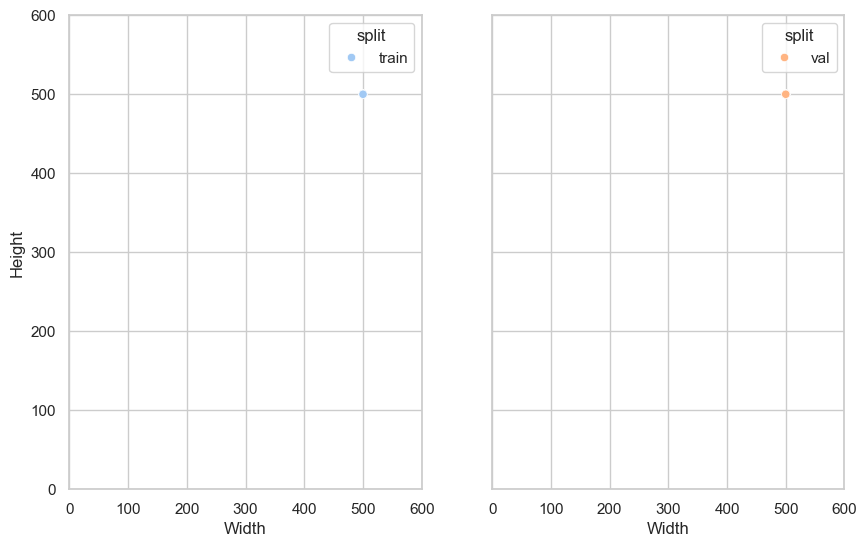

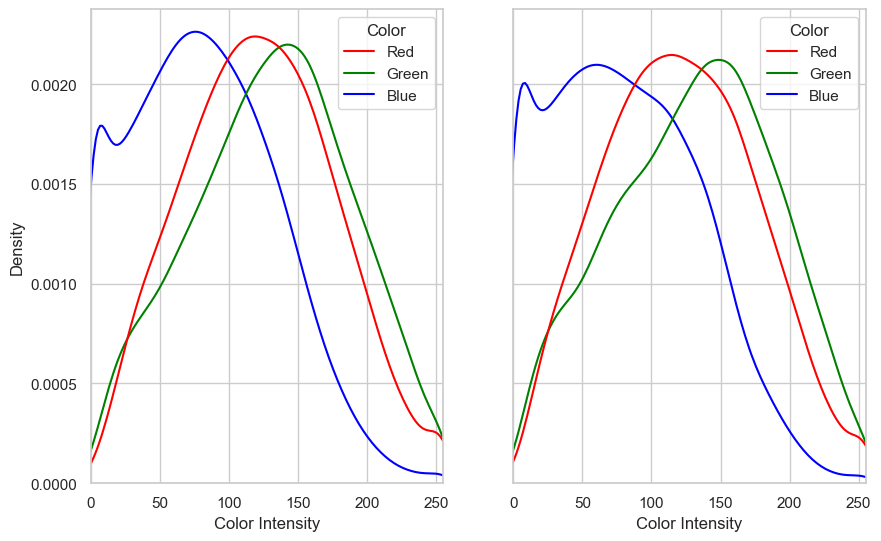

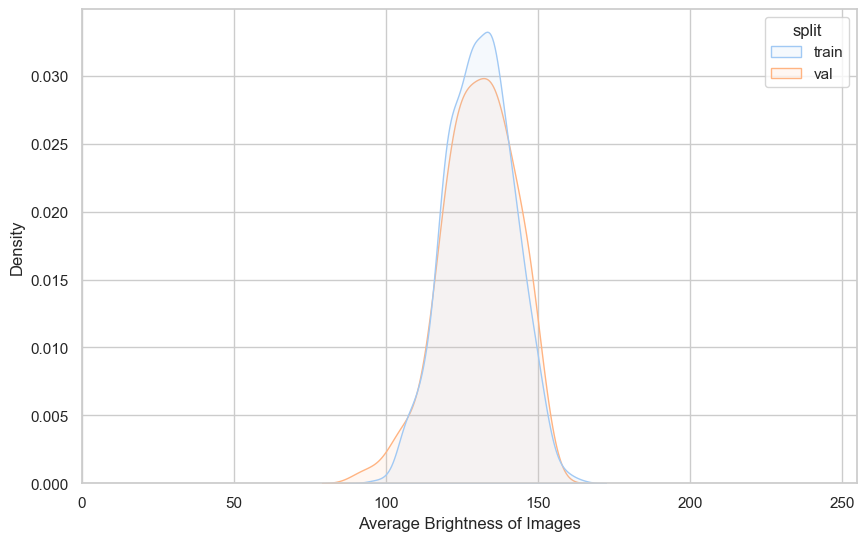

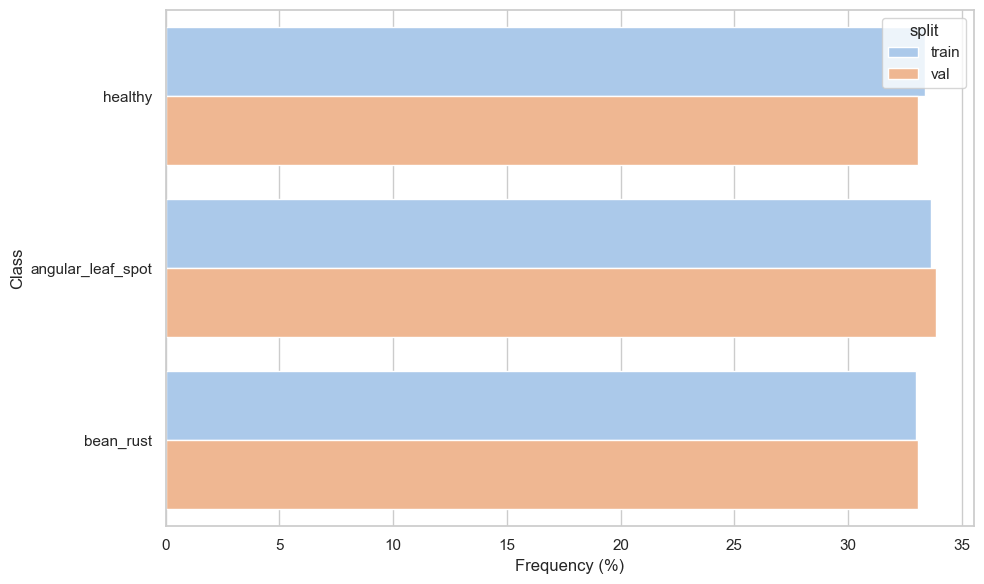

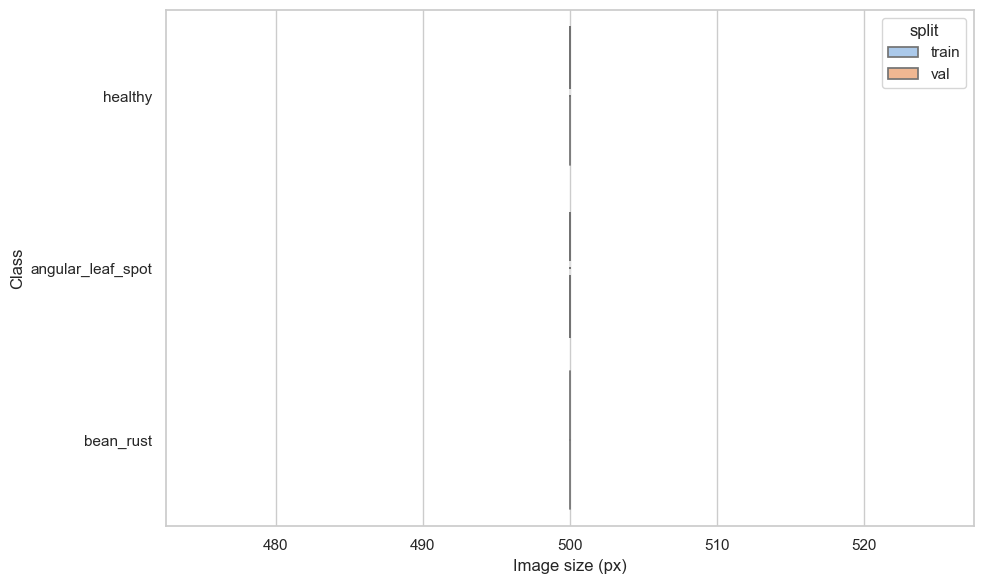

In [11]:
analyzer = ClassificationAnalysisManager(
    report_title="Testing Data-Gradients Classification for iBean",
    train_data=train_loader,
    val_data=val_loader,
    class_names=ibean_classes,
)

analyzer.run()

In [ ]:
# TO DO:

# (1) Test alaysis of an Object Detection dataset
# (2) Test analysis of a Semantic Segmentation dataset